# Testing the guess algorithm - Position testing

#### TODO: convert graphs to actual position matrix. currently to hard for me :(

## Additonal reading material:
1. Quantum optimization of maximum independent set using Rydberg atom arrays - S. Ebadi

In [4]:
import ipynb.fs.defs.guess_algorithm as algo
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

## Making new graphs

The types of graphs we want to test are:
1. chain graphs 
2. bipartite graphs
3. tree graphs
4. cycles

To make it calulatable we Make all graphs with 10 vertexs.

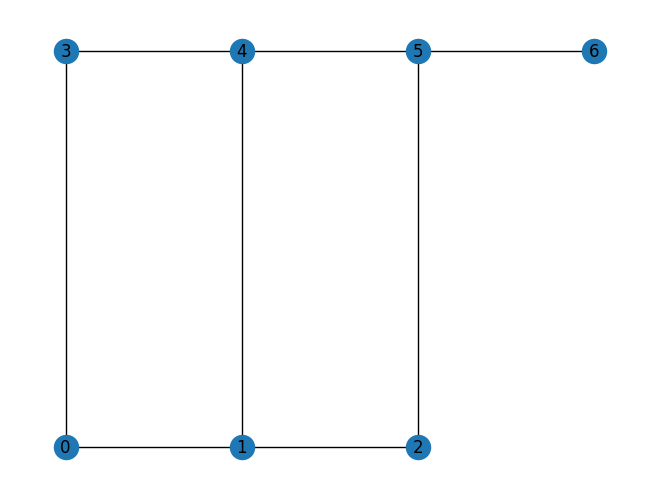

In [7]:
class PosGraph(algo.BaseGraph):
    def __init__(self, N,blockade_radius):
        self.blockade_radius = blockade_radius
        super().__init__(N)
    
    def create_graph(self, graph_array):
        """Creates a graph from the given positions."""
        self.add_edges(graph_array)
        
    def add_edges(self, graph_array):
        """Adds edges based on the blockade radius between nodes represented by positions."""
        for v in range(self.N):
            for w in range(v + 1, self.N):
                dist = self.calculate_distance(graph_array[v], graph_array[w])
                if dist <= self.blockade_radius:
                    self.graph.add_edge(v, w)

    def calculate_distance(self, pos1, pos2):
        """Calculates the Euclidean distance between two positions."""
        dist_x = pos1[0] - pos2[0]
        dist_y = pos1[1] - pos2[1]
        return np.sqrt(dist_x**2 + dist_y**2)
    
    def plot_graph(self):
        """Plots the generated graph."""
        nx.draw(self.graph, with_labels=True, pos=nx.get_node_attributes(self.graph, 'pos'))
        plt.show()


class BipartiteGraph(PosGraph):
    """Class for generating a bipartite graph."""

    def __init__(self, N, blockade_radius):
        super().__init__(N, blockade_radius)

    def create_graph(self):
        """Creates a random bipartite graph and adds edges based on blockade radius."""
        # Split nodes into two sets
        set1 = range(self.N // 2)
        set2 = range(self.N // 2, self.N)

        # Store positions for the nodes
        positions = {}

        # Add nodes to set1 (e.g., y = 0) and set2 (e.g., y = 1)
        for u in set1:
            positions[u] = (u, 0)  # Position nodes in set1 on y=0
            self.graph.add_node(u, pos=positions[u])

        for v in set2:
            positions[v] = (v - self.N // 2, 1)  # Position nodes in set2 on y=1
            self.graph.add_node(v, pos=positions[v])

        # Add edges based on blockade radius
        super().create_graph(list(positions.values()))


        
class CycleGraph(PosGraph):
    """Class for generating a cycle graph."""
    
    def __init__(self, N, blockade_radius):
        super().__init__(N, blockade_radius)

    def create_graph(self):
        """Creates a cycle graph and adds edges based on blockade radius."""
        graph = []
        
        # Adjust the radius for positioning nodes
        if self.N > 2:
            # For larger N, use blockade_radius to position nodes
            angle_step = 2 * np.pi / self.N
            for i in range(self.N):
                angle = angle_step * i
                pos = (self.blockade_radius * np.cos(angle), self.blockade_radius * np.sin(angle))  # Positions on a circle
                graph.append(pos)
                self.graph.add_node(i, pos=pos)

            # Ensure edges are created correctly for the cycle
            for i in range(self.N):
                self.graph.add_edge(i, (i + 1) % self.N)  # Connect to the next node
            
        else:
            # Handle the cases where N <= 2
            for i in range(self.N):
                pos = (i * (self.blockade_radius), 0)  # Linear positioning for N = 1 or 2
                graph.append(pos)
                self.graph.add_node(i, pos=pos)
            if self.N == 2:
                self.graph.add_edge(0, 1)  # Connect the two nodes

        super().create_graph(graph)


class TreeGraph(PosGraph):
    """Class for generating a manually defined tree graph."""
    
    def __init__(self, N, blockade_radius):
        super().__init__(N, blockade_radius)
    
    def create_graph(self):
        """Creates a manually structured tree graph with appropriate spacing."""
        graph_positions = {
            0: (0, 0),  # Root
            1: (self.blockade_radius * 0.8 * np.cos(np.pi * 1.25), self.blockade_radius * 0.8 * np.sin(np.pi * 1.25)),  # Left child
            2: (self.blockade_radius * 0.8 * np.cos(np.pi * 1.75), self.blockade_radius * 0.8 * np.sin(np.pi * 1.75)),  # Right child
            3: (self.blockade_radius * 0.8 * np.cos(np.pi * 1.25) - self.blockade_radius *0.99, self.blockade_radius * 0.8 * np.sin(np.pi * 1.25)),  # Left grandchild 1
            4: (self.blockade_radius * 0.8 * np.cos(np.pi * 1.25) * 0.5, self.blockade_radius * 0.99 * np.sin(np.pi * 1.25) - self.blockade_radius * 0.5),  # Left grandchild 2
            5: (self.blockade_radius * 0.99 * np.cos(np.pi * 1.75) * 1.25, self.blockade_radius * 0.99 * np.sin(np.pi * 1.75) - self.blockade_radius * 0.5),  # Right grandchild 2
        }
        
        # Add children for N > 6
        for i in range(6, self.N):
            if i % 3 == 0:  # Child of node 3
                child_pos = (graph_positions[i-3][0], graph_positions[i-3][1] - (self.blockade_radius *0.99))
                graph_positions[i] = child_pos
            elif i % 3 == 1 :  # Child of node 4
                child_pos = (graph_positions[i-3][0], graph_positions[i-3][1] - (self.blockade_radius *0.99))
                graph_positions[i] = child_pos
            elif i % 3 == 2 :  # Child of node 5
                child_pos = (graph_positions[i-3][0], graph_positions[i-3][1] - (self.blockade_radius *0.99))
                graph_positions[i] = child_pos
        
        # Add the initial nodes with their positions
        for idx, pos in graph_positions.items():
            self.graph.add_node(idx, pos=pos)
        
        # Add edges based on blockade radius (only for the existing nodes)
        super().create_graph(list(graph_positions.values()))


N = 7
init_params = algo.initialize_system_parameters()
tree_graph = BipartiteGraph(N, init_params["blockade_radius"])
tree_graph.create_graph()
tree_graph.plot_graph()